<a href="https://colab.research.google.com/github/sharlynmuturi/Pytorch-Tutorial/blob/main/wine_quality_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/WineQT.csv')
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [13]:
data.shape

(1143, 13)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Classes of target variable

In [3]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

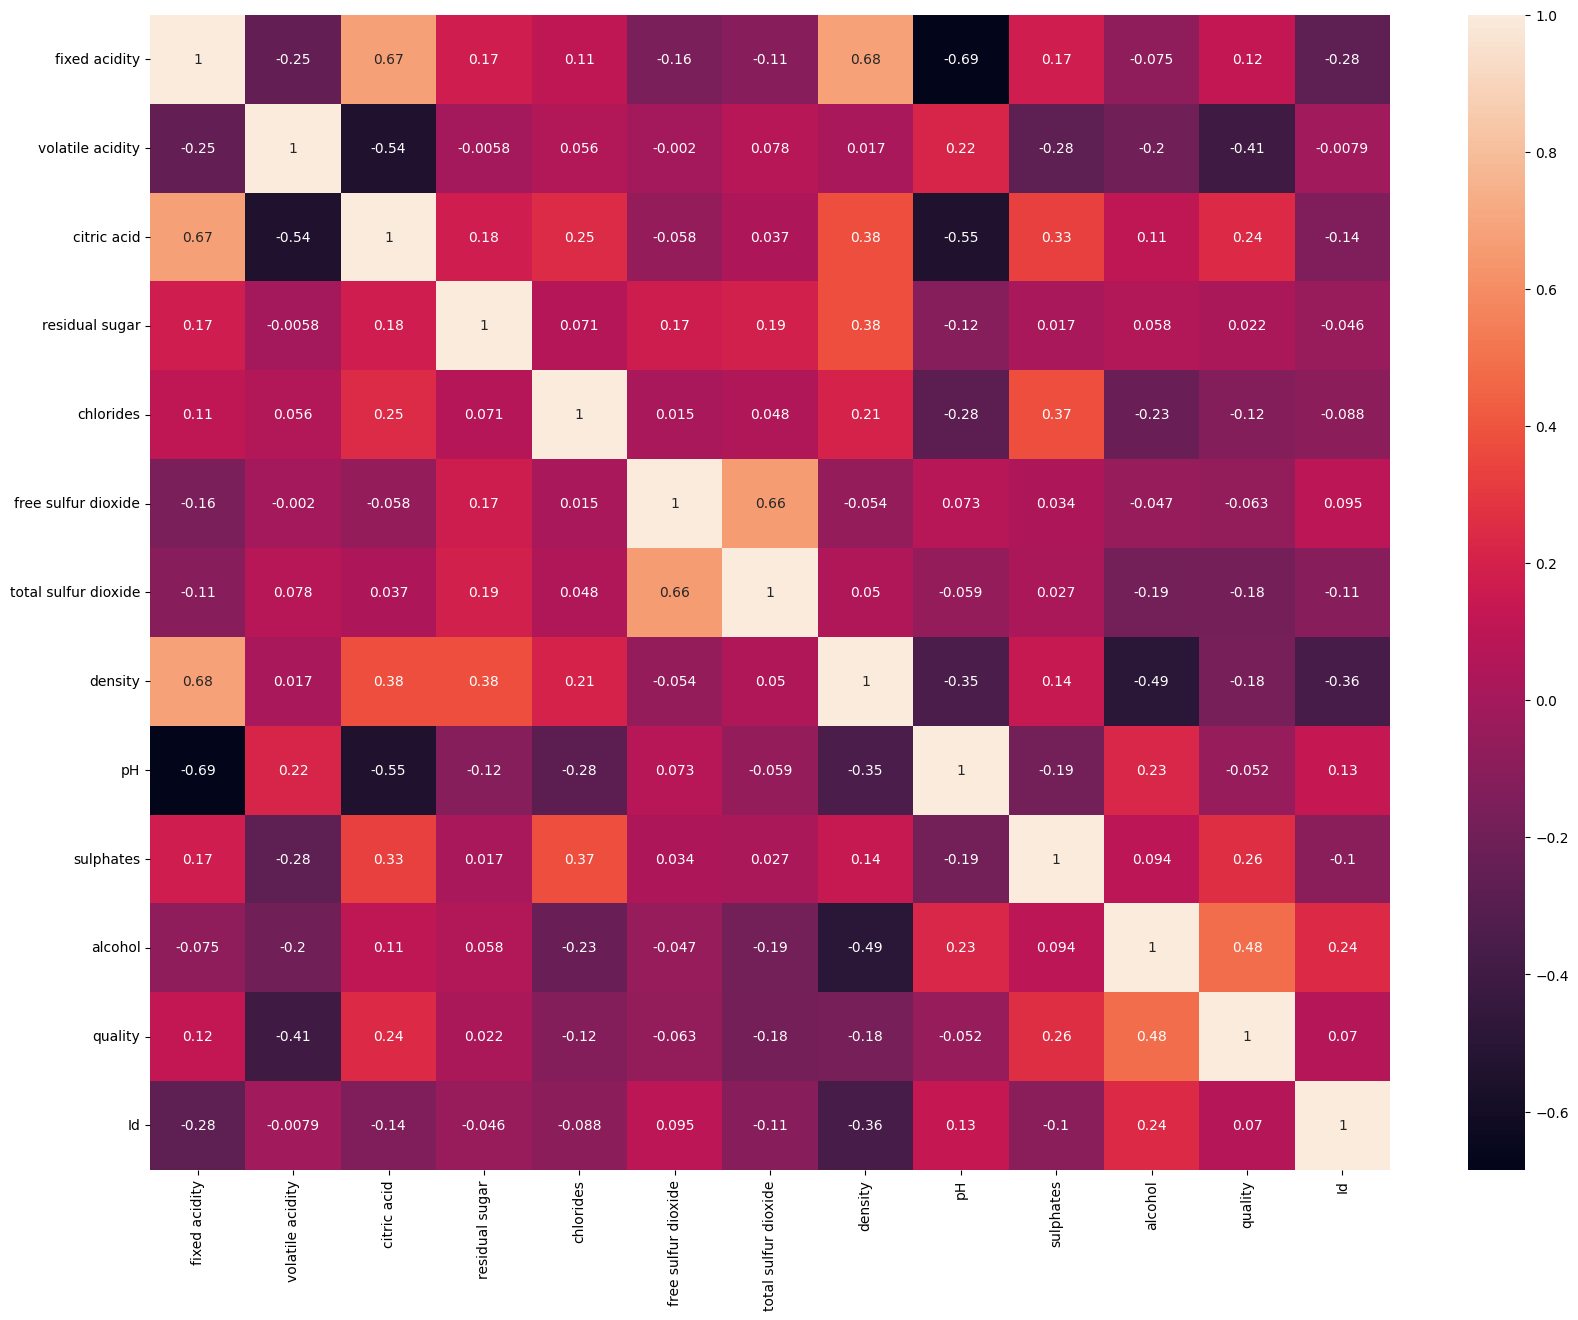

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()
plt.savefig('Correlation Matrix.png')

Identifing and removing Outliers via z-score.

z > 3, is an outlier

In [9]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.52157961 0.93933222 1.36502663 ... 0.96338181 0.81572437 1.73561799]
 [0.29259344 1.94181282 1.36502663 ... 0.59360107 0.81572437 1.73346186]
 [0.29259344 1.27349242 1.16156762 ... 0.59360107 0.81572437 1.73130573]
 ...
 [1.20853813 0.38239855 0.9581086  ... 0.05351522 0.81572437 1.70125196]
 [1.38027776 0.10393172 0.8563791  ... 0.70063152 0.42578423 1.70340809]
 [1.38027776 0.6330187  0.75464959 ... 0.22382033 0.81572437 1.70772035]]


In [10]:
print(np.where(z>3))

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122]), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  4,  1,  4,  9

In [11]:
new_data = data[(z<3).all(axis=1)]

In [12]:
new_data.shape

(1041, 13)

Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

X = new_data.drop(columns = 'quality')
y = new_data['quality']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Modelling

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
y_pred = rf_model.predict(X_test)

In [17]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6698564593301436


Hyperparameter Tuning via GridSearchCv

[Text(0.5317427295024527, 0.9722222222222222, 'x[11] <= 935.0\ngini = 0.646\nsamples = 539\nvalue = [28, 344, 339, 105, 16]'),
 Text(0.3425455501051156, 0.9166666666666666, 'x[0] <= 10.05\ngini = 0.614\nsamples = 315\nvalue = [21.0, 241.0, 156.0, 46.0, 5.0]'),
 Text(0.4371441398037842, 0.9444444444444444, 'True  '),
 Text(0.1875437981779958, 0.8611111111111112, 'x[10] <= 9.85\ngini = 0.576\nsamples = 251\nvalue = [17.0, 218.0, 114.0, 28.0, 4.0]'),
 Text(0.10721793973370708, 0.8055555555555556, 'x[11] <= 598.5\ngini = 0.421\nsamples = 146\nvalue = [14, 169, 46, 2, 0]'),
 Text(0.04905395935529082, 0.75, 'x[2] <= 0.05\ngini = 0.326\nsamples = 81\nvalue = [10, 99, 11, 2, 0]'),
 Text(0.016818500350385426, 0.6944444444444444, 'x[10] <= 9.25\ngini = 0.625\nsamples = 14\nvalue = [8, 12, 2, 2, 0]'),
 Text(0.011212333566923615, 0.6388888888888888, 'gini = 0.0\nsamples = 3\nvalue = [5, 0, 0, 0, 0]'),
 Text(0.02242466713384723, 0.6388888888888888, 'x[3] <= 1.95\ngini = 0.554\nsamples = 11\nvalue =

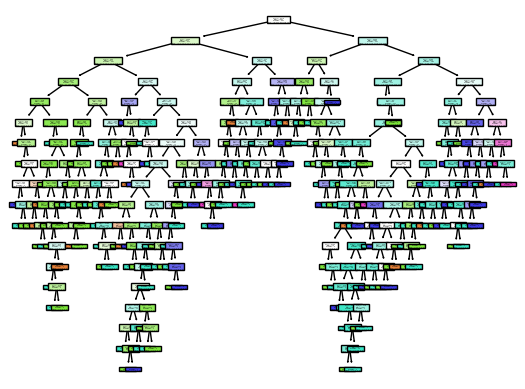

In [19]:
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(rf_model.estimators_[0],
               filled = True)

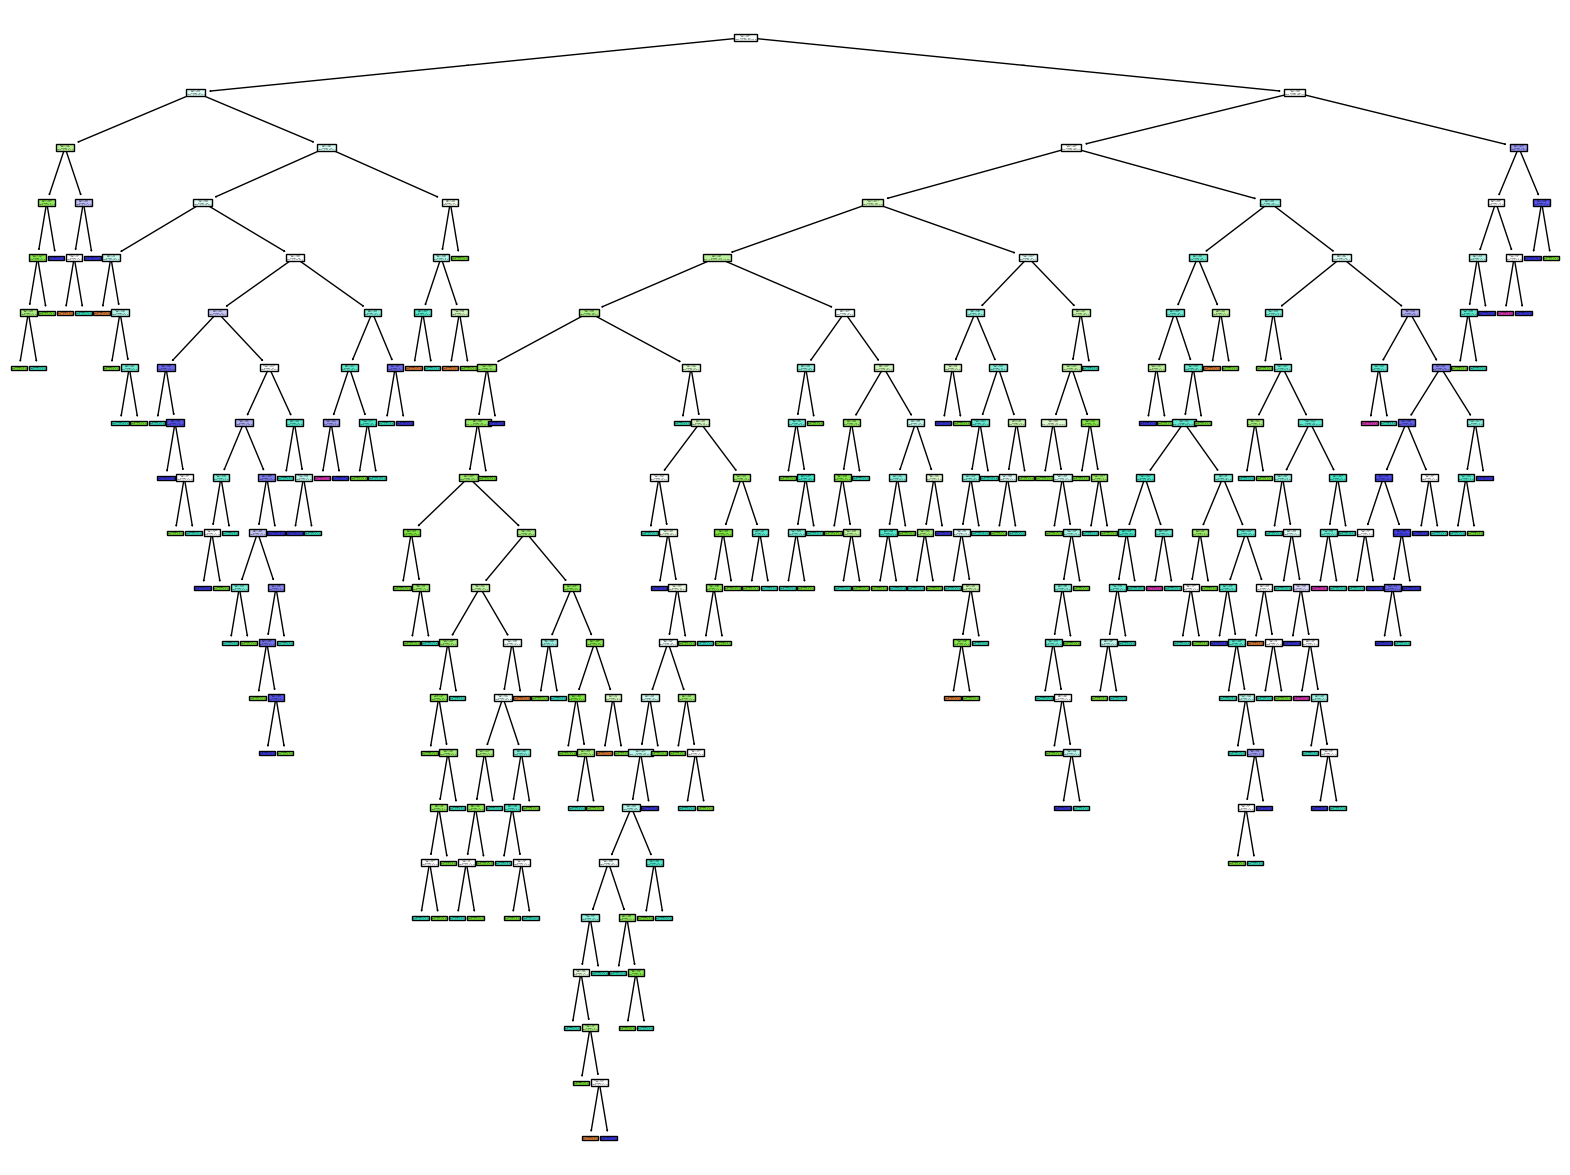

In [20]:
plt.figure(figsize=(20,15))
for i in range(len(rf_model.estimators_)):
  tree.plot_tree(rf_model.estimators_[i],
                 filled = True)